$$Diego \space Castillo \space Reyes$$

# Números Pares
Crear un circuito que solo nos de números impares y que se vean en el histograma

## qiskit

In [1]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

Como queremos obtener los impares el qubit $q_2$ debe ser 0:

$|001 \rangle$, $|011 \rangle$, $|101 \rangle$ y $|111 \rangle$

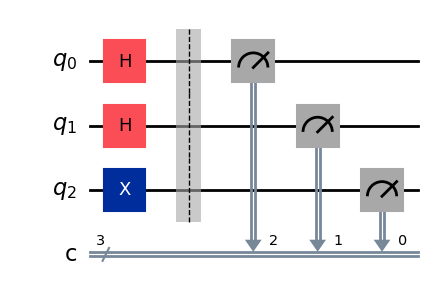

In [2]:
# Creation of a Quantum Circuit
qc = QuantumCircuit(3, 3)

# Aplly Hadamard gate to the first and second qubit 
qc.h(0)
qc.h(1)
# Aplly X gate to the third qubit
qc.x(2)

qc.barrier()

# Made the measurements
qc.measure(0, 2)
qc.measure(1, 1)
qc.measure(2, 0)

# Draw the circuit
qc.draw('mpl')

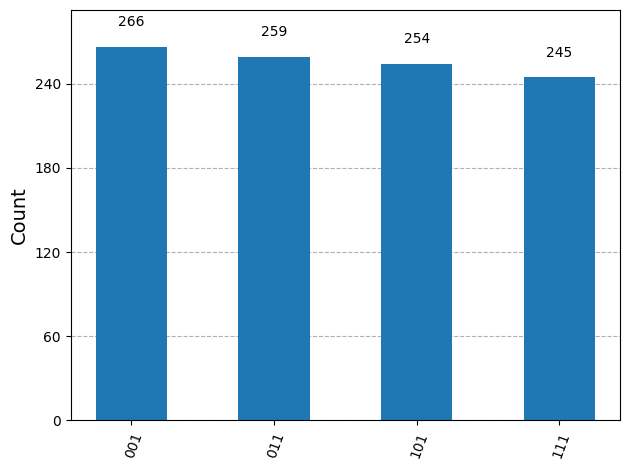

In [3]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator with 1024 shots
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1024)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# Draw the histogram of the results
plot_histogram(counts)